# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [74]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [75]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


There are 150 observations and 5 features.

#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


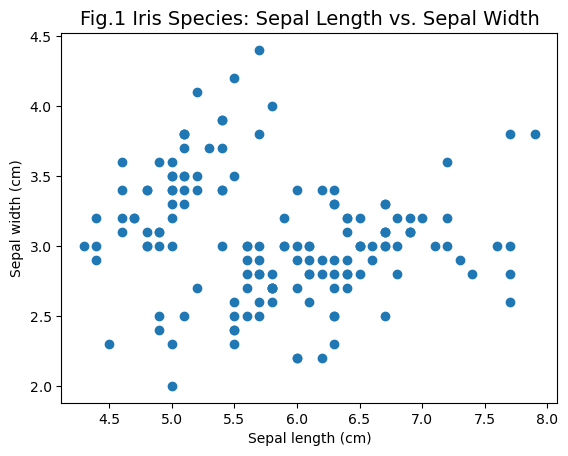

In [76]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])

plt.title('Fig.1 Iris Species: Sepal Length vs. Sepal Width', fontsize=14)
plt.xlabel('Sepal length (cm)', fontsize=10)
plt.ylabel('Sepal width (cm)', fontsize=10)

plt.show()

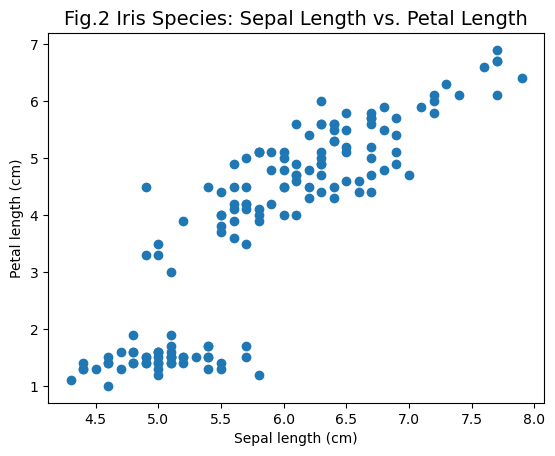

In [77]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])

plt.title('Fig.2 Iris Species: Sepal Length vs. Petal Length', fontsize=14)
plt.xlabel('Sepal length (cm)', fontsize=10)
plt.ylabel('Petal length (cm)', fontsize=10)

plt.show()

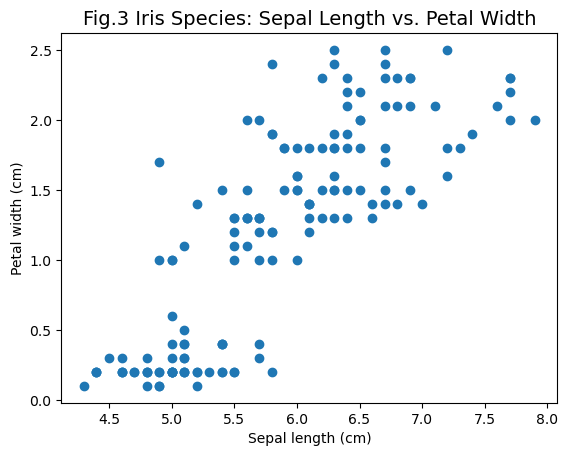

In [78]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal width (cm)'])

plt.title('Fig.3 Iris Species: Sepal Length vs. Petal Width', fontsize=14)
plt.xlabel('Sepal length (cm)', fontsize=10)
plt.ylabel('Petal width (cm)', fontsize=10)

plt.show()

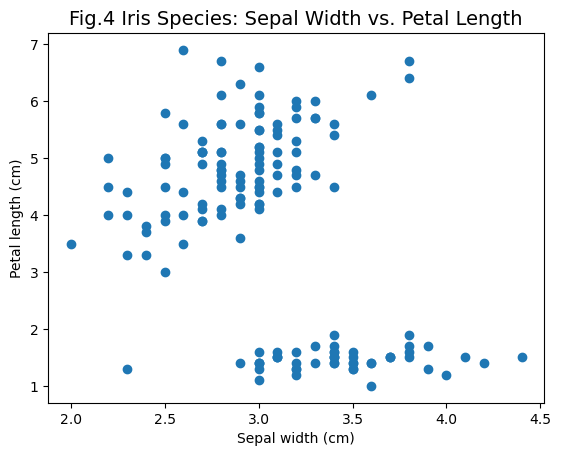

In [79]:
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal length (cm)'])

plt.title('Fig.4 Iris Species: Sepal Width vs. Petal Length', fontsize=14)
plt.xlabel('Sepal width (cm)', fontsize=10)
plt.ylabel('Petal length (cm)', fontsize=10)

plt.show()

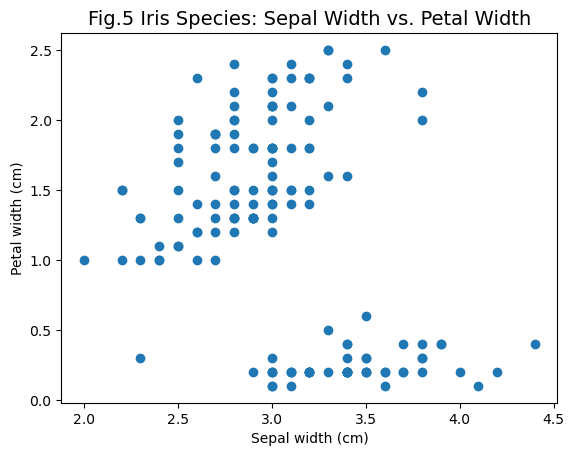

In [80]:
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'])

plt.title('Fig.5 Iris Species: Sepal Width vs. Petal Width', fontsize=14)
plt.xlabel('Sepal width (cm)', fontsize=10)
plt.ylabel('Petal width (cm)', fontsize=10)

plt.show()

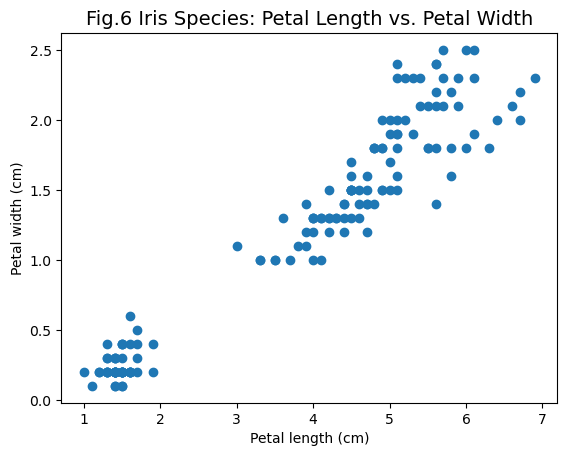

In [81]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])

plt.title('Fig.6 Iris Species: Petal Length vs. Petal Width', fontsize=14)
plt.xlabel('Petal length (cm)', fontsize=10)
plt.ylabel('Petal width (cm)', fontsize=10)

plt.show()

#### **Question 3:** 
#### Data cleaning

In [82]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the species column)
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add the species column back to the scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

While all datapoints are in centimeters, there is a big difference between features' values. Petal width feature has values as low as 0.2 cm, but features like Sepal length have values of 6.7 cm or above. Without standardization comparing petal width to sepal length is not going to return an accurate answer. Standardizing all the values ensures that no datapoints impact the outcome more than other datapoints.  

#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [83]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(scaled_iris_df)

c:\Users\Anca\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [93]:
scaled_iris_with_clusters = scaled_iris_df[['sepal length (cm)', 'sepal width (cm)']].copy()

scaled_iris_with_clusters['Cluster'] = clusters.labels_

scaled_iris_with_clusters

,sepal length (cm),sepal width (cm),Cluster
0,-0.900681,1.019004,1
1,-1.143017,-0.131979,1
2,-1.385353,0.328414,1
3,-1.506521,0.098217,1
4,-1.021849,1.249201,1
...,...,...,...
145,1.038005,-0.131979,2
146,0.553333,-1.282963,0
147,0.795669,-0.131979,2
148,0.432165,0.788808,2


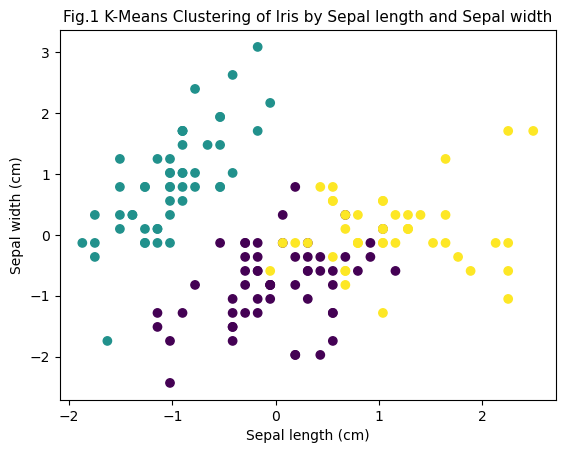

In [97]:
plt.scatter(scaled_iris_with_clusters['sepal length (cm)'], scaled_iris_with_clusters['sepal width (cm)'], c=scaled_iris_with_clusters['Cluster'])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Fig.1 K-Means Clustering of Iris by Sepal length and Sepal width', fontsize=11)

plt.show()

In [98]:
scaled_iris_with_clusters = scaled_iris_df[['sepal length (cm)', 'petal length (cm)']].copy()

scaled_iris_with_clusters['Cluster'] = clusters.labels_

scaled_iris_with_clusters

,sepal length (cm),petal length (cm),Cluster
0,-0.900681,-1.340227,1
1,-1.143017,-1.340227,1
2,-1.385353,-1.397064,1
3,-1.506521,-1.283389,1
4,-1.021849,-1.340227,1
...,...,...,...
145,1.038005,0.819596,2
146,0.553333,0.705921,0
147,0.795669,0.819596,2
148,0.432165,0.933271,2


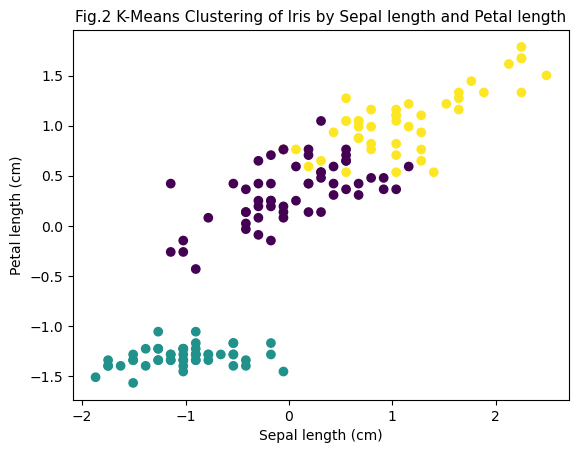

In [99]:
plt.scatter(scaled_iris_with_clusters['sepal length (cm)'], scaled_iris_with_clusters['petal length (cm)'], c=scaled_iris_with_clusters['Cluster'])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Fig.2 K-Means Clustering of Iris by Sepal length and Petal length', fontsize=11)

plt.show()

In [100]:
scaled_iris_with_clusters = scaled_iris_df[['sepal length (cm)', 'petal width (cm)']].copy()

scaled_iris_with_clusters['Cluster'] = clusters.labels_

scaled_iris_with_clusters

,sepal length (cm),petal width (cm),Cluster
0,-0.900681,-1.315444,1
1,-1.143017,-1.315444,1
2,-1.385353,-1.315444,1
3,-1.506521,-1.315444,1
4,-1.021849,-1.315444,1
...,...,...,...
145,1.038005,1.448832,2
146,0.553333,0.922303,0
147,0.795669,1.053935,2
148,0.432165,1.448832,2


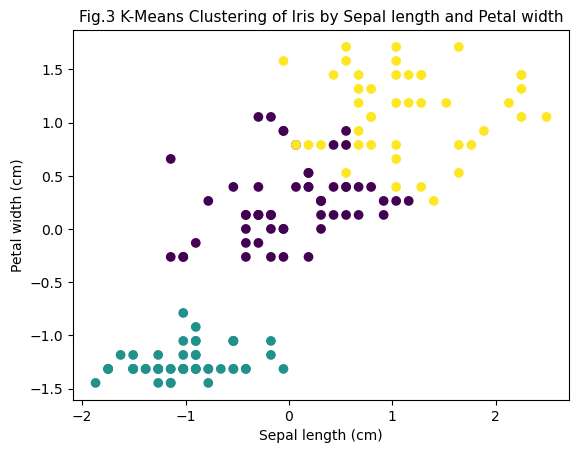

In [101]:
plt.scatter(scaled_iris_with_clusters['sepal length (cm)'], scaled_iris_with_clusters['petal width (cm)'], c=scaled_iris_with_clusters['Cluster'])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Fig.3 K-Means Clustering of Iris by Sepal length and Petal width', fontsize=11)

plt.show()

In [102]:
scaled_iris_with_clusters = scaled_iris_df[['sepal width (cm)', 'petal length (cm)']].copy()

scaled_iris_with_clusters['Cluster'] = clusters.labels_

scaled_iris_with_clusters

,sepal width (cm),petal length (cm),Cluster
0,1.019004,-1.340227,1
1,-0.131979,-1.340227,1
2,0.328414,-1.397064,1
3,0.098217,-1.283389,1
4,1.249201,-1.340227,1
...,...,...,...
145,-0.131979,0.819596,2
146,-1.282963,0.705921,0
147,-0.131979,0.819596,2
148,0.788808,0.933271,2


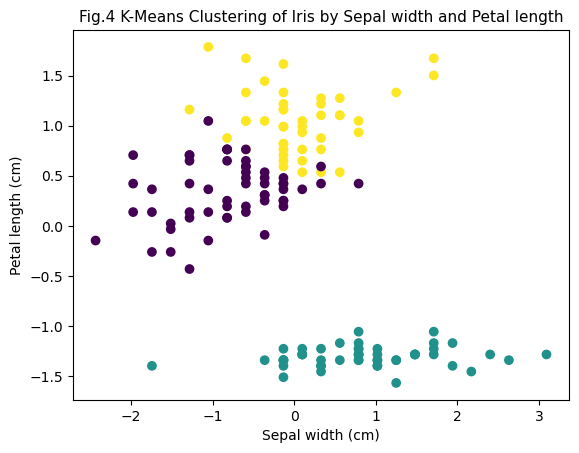

In [103]:
plt.scatter(scaled_iris_with_clusters['sepal width (cm)'], scaled_iris_with_clusters['petal length (cm)'], c=scaled_iris_with_clusters['Cluster'])

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Fig.4 K-Means Clustering of Iris by Sepal width and Petal length', fontsize=11)

plt.show()

In [104]:
scaled_iris_with_clusters = scaled_iris_df[['sepal width (cm)', 'petal width (cm)']].copy()

scaled_iris_with_clusters['Cluster'] = clusters.labels_

scaled_iris_with_clusters

,sepal width (cm),petal width (cm),Cluster
0,1.019004,-1.315444,1
1,-0.131979,-1.315444,1
2,0.328414,-1.315444,1
3,0.098217,-1.315444,1
4,1.249201,-1.315444,1
...,...,...,...
145,-0.131979,1.448832,2
146,-1.282963,0.922303,0
147,-0.131979,1.053935,2
148,0.788808,1.448832,2


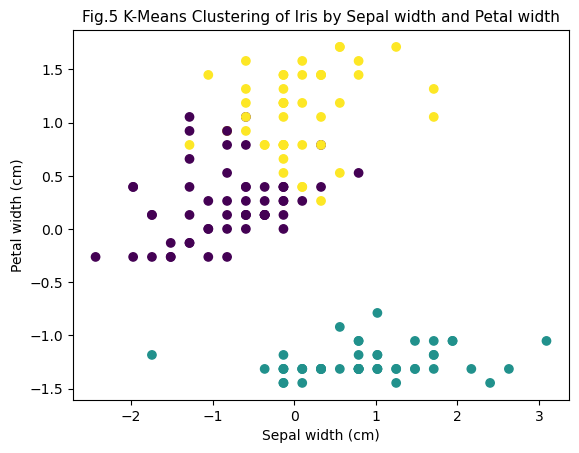

In [105]:
plt.scatter(scaled_iris_with_clusters['sepal width (cm)'], scaled_iris_with_clusters['petal width (cm)'], c=scaled_iris_with_clusters['Cluster'])

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Fig.5 K-Means Clustering of Iris by Sepal width and Petal width', fontsize=11)

plt.show()

In [106]:
scaled_iris_with_clusters = scaled_iris_df[['petal length (cm)', 'petal width (cm)']].copy()

scaled_iris_with_clusters['Cluster'] = clusters.labels_

scaled_iris_with_clusters

,petal length (cm),petal width (cm),Cluster
0,-1.340227,-1.315444,1
1,-1.340227,-1.315444,1
2,-1.397064,-1.315444,1
3,-1.283389,-1.315444,1
4,-1.340227,-1.315444,1
...,...,...,...
145,0.819596,1.448832,2
146,0.705921,0.922303,0
147,0.819596,1.053935,2
148,0.933271,1.448832,2


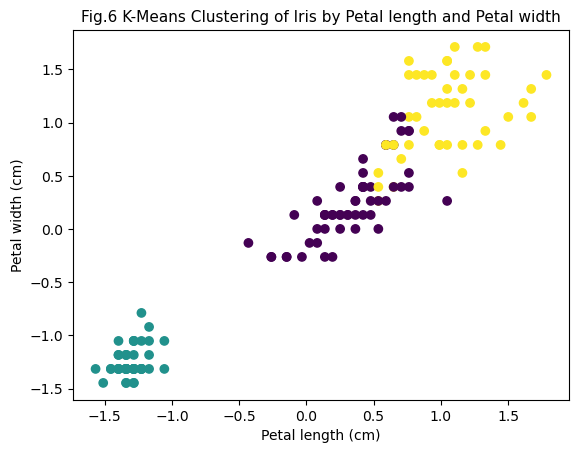

In [107]:
plt.scatter(scaled_iris_with_clusters['petal length (cm)'], scaled_iris_with_clusters['petal width (cm)'], c=scaled_iris_with_clusters['Cluster'])

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Fig.6 K-Means Clustering of Iris by Petal length and Petal width', fontsize=11)

plt.show()

Discuss the results of the K-Means clustering. How well did the clusters match the true species?

Visualizing the results of the K-Means clustering allows us to visualize the 3 clusters  -- in the sepal to sepal visualization the datapoints are scattered; in the visualization of sepal values vs. petal values, the datapoints are more grouped by features.

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

In [108]:
one_sample = iris_df.sample(n=15)
one_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
51,6.4,3.2,4.5,1.5,1
122,7.7,2.8,6.7,2.0,2
116,6.5,3.0,5.5,1.8,2
41,4.5,2.3,1.3,0.3,0
8,4.4,2.9,1.4,0.2,0
134,6.1,2.6,5.6,1.4,2
59,5.2,2.7,3.9,1.4,1
83,6.0,2.7,5.1,1.6,1
82,5.8,2.7,3.9,1.2,1
147,6.5,3.0,5.2,2.0,2


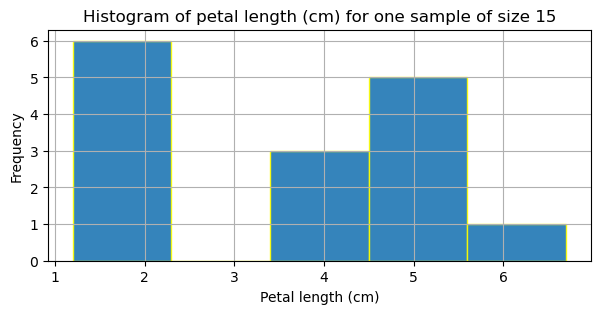

In [116]:
plt.figure(figsize=(7, 3))
plt.hist(one_sample['petal length (cm)'], bins=5, edgecolor='yellow', alpha=0.9)

plt.title('Histogram of petal length (cm) for one sample of size 15')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [112]:
one_sample['petal length (cm)'].mean()

3.486666666666667

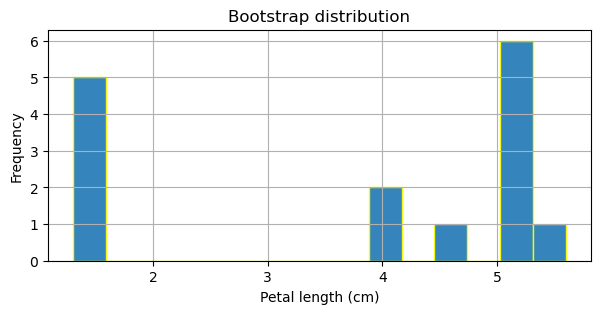

In [123]:

boot1 = one_sample.sample(frac=1, replace=True)

plt.figure(figsize=(7, 3))
plt.hist(boot1['petal length (cm)'], bins=15, edgecolor='yellow', alpha=0.9)

plt.title('Bootstrap distribution')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [126]:
boot1["petal length (cm)"].mean()

3.72

In [127]:
bootstrap_samples = []

for i in range(1000):
    sample = one_sample.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

boot1000 = pd.concat(bootstrap_samples)

boot1000

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,replicate
147,6.5,3.0,5.2,2.0,2,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0
134,6.1,2.6,5.6,1.4,2,0
83,6.0,2.7,5.1,1.6,1,0
...,...,...,...,...,...,...
10,5.4,3.7,1.5,0.2,0,999
134,6.1,2.6,5.6,1.4,2,999
21,5.1,3.7,1.5,0.4,0,999
9,4.9,3.1,1.5,0.1,0,999


In [128]:
boot_means = boot1000.groupby('replicate')['petal length (cm)'].mean().reset_index(name='mean_petal_length')
boot_means

,replicate,mean_petal_length
0,0,3.433333
1,1,2.546667
2,2,3.733333
3,3,3.800000
4,4,3.393333
...,...,...
995,995,3.153333
996,996,3.840000
997,997,3.933333
998,998,3.293333


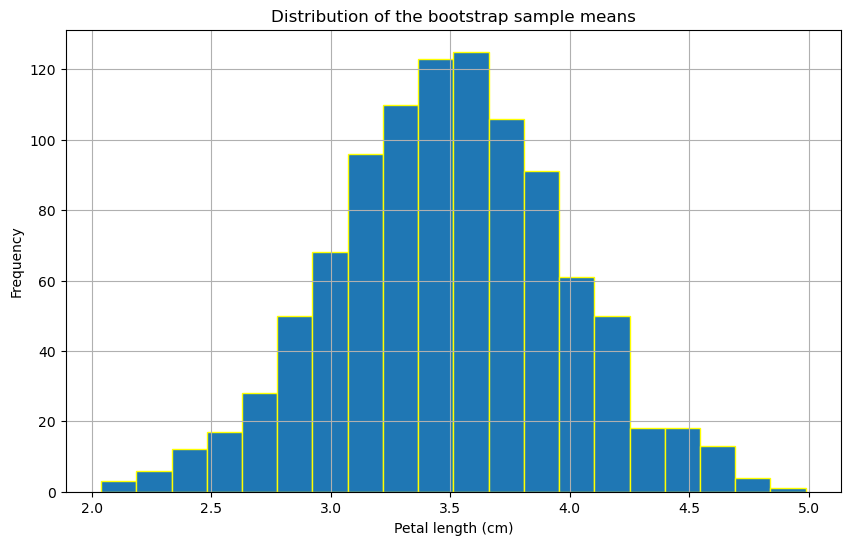

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_petal_length'], bins=20, edgecolor='yellow', alpha=1)

plt.title('Distribution of the bootstrap sample means')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [130]:
ci_bounds = boot_means["mean_petal_length"].quantile([0.025, 0.975])
ci_bounds

0.025    2.539667
0.975    4.480000
Name: mean_petal_length, dtype: float64

Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

The sample has the petal length mean size of 3.48 cm.  
The bootstrap mean of petal length is 3.72 cm. Based on the 95% confidence interval, we estimate the true mean of petal length in the dataset to be between 2.53 cm and 4.48 cm. The sample mean (3.48) is very close to the mean of the values within the 95% confidence interval (the mean of [2.53, 4.48] is 3.50.)

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
